## Previsão de processos aleatórios (_random walk_)

### Introdução

Uma série temporal é dita ser do tipo _random walk_ quando há igual probabilidade do seu valor crescer ou subir no próximo instante. Em outras palavras, um _random walk_ é um processo que se comporta de forma completamente aleatória.

De modo mais formal, define-se como _random walk_ um processo cuja **diferença primeira** (série de diferenças primeiras) **não possui autocorrelação** e é **estacionária** - ou seja, mantém suas propriedades estatísticas ao longo do tempo (sua média, desvio-padrão etc. não mudam com o tempo). Essas duas características garantem que o processo ocorre aleatoriamente, sendo **impossível** prever o seu próximo valor.

Apesar de ser completamente aleatória, um _random walk_ ainda costuma apresentar tendências de crescimento ou decrescimento por períodos longos, mas isso ocorre ao acaso e essas tendências são geralmente seguidas por mudanças abruptas de comportamento, como uma queda ou subida muito rápida. Vale ressaltar que esse comportamento só ocorrerá na série original, sendo, por definição, inexistente na série de diferenças.

A equação que descreve um _random walk_ define que o valor atual da série, $y_t$, depende do seu valor anterior, $y_\text{t-1}$ ,acrescido de uma "tendência" (ou drift) $C$ e de um ruído branco $\epsilon$, ou seja, um valor amostrado de uma distribuição aleatória com média zero, como equacionado a seguir: $$ y_t = y_\text{t-1} + C + \epsilon $$

Desse modo, se $C = 0$ e o primeiro valor da série for $0$, os valores posteriores da _random walk_ serão uma soma cumulativa de valores aleatórios $ \epsilon_1, \epsilon_2, \epsilon_3 $ etc. A seguir, simula-se uma série temporal com comportamento de _random walk_ com essas características:

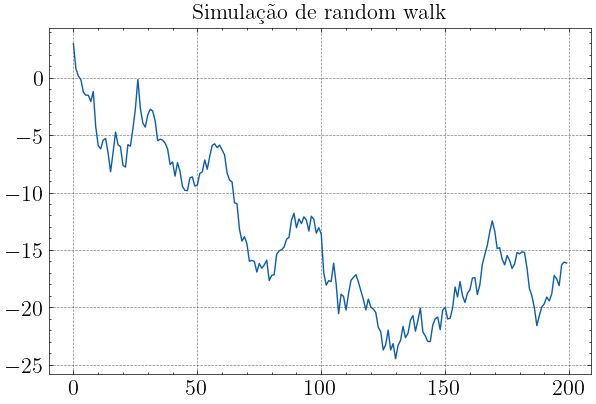

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['grid', 'notebook', 'science'])
plt.rcParams['figure.figsize'] = [7, 4.5]

# Geração de uma sequência de 200 valores aleatórios (optei por amostrá-los de uma normal-padrão)
random_values = np.random.standard_normal(200)

# Geração da série temporal (como o valor inicial é zero, todos os demais valores da série são uma
# soma cumulativa de valores aleatórios)
random_walk = np.cumsum(random_values)

# Plot da série
plt.plot(random_walk)
plt.title('Simulação de random walk')
plt.show()

### Identificação de um _random walk_

Como citado anteriormente, a definição de um _random walk_ é precisa e clara: uma série temporal é desse tipo se a sua **série de diferenças** for estacionária e não tiver autocorrelação significativa fora do lag 0.

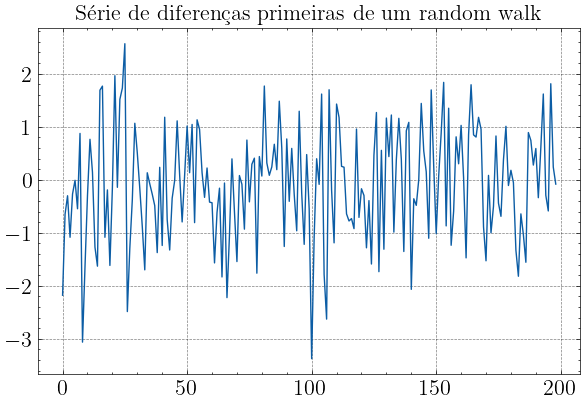

In [12]:
# Geração da série de diferenças do random walk gerado
diff_series = np.diff(random_walk)

# Plot da série de diferenças
plt.plot(diff_series)
plt.title('Série de diferenças primeiras de um random walk')
plt.show()

Para testar a estacionariedade da série, é comum utilizar o teste ADF (_augmented Dickey-Fuller_), um teste de hipótese que avalia a existência de uma raiz unitária na série temporal, que implicaria na sua não-estacionariedade. O teste retorna sempre valores negativos, sendo mais negativo o valor quanto maior for a evidência a favor da hipótese alternativa. No caso desse teste, a hipótese nula é a existência de uma raiz unitária e a hipótese alternativa é a não existência dessa raiz. Assim, se o teste retornar um valor muito negativo ou um p-valor abaixo do nivel de significância especificado (geralmente 0,05), considera-se que o processo é estacionário. Ainda de forma geral, pode-se avaliar se as propriedades estatísticas da série se mantêm constantes sem utilizar o teste de hipóteses em questão, mas essa é a metodologia sugerida pelo livro.

In [15]:
# Teste de hipóteses ADF com a série de diferenças
from statsmodels.tsa.stattools import adfuller
ADF = adfuller(diff_series) 

print(f'Estatística do ADF: {ADF[0]}') 
print(f'valor-p: {ADF[1]}')

Estatística do ADF: -13.397377858048207
valor-p: 4.638417106237114e-25


Para testar a autocorrelação da série, utiliza-se simplesmente a correlação cruzada da série com ela mesma, retornando o coeficiente de correlação de Pearson da série com seus próprios valores atrasados. Se houver muitos lags consecutivos com correlação significativa, tem-se um indício de que a série é autocorrelacionada e, portanto, não é aleatória. O livro sugere a função de autocorrelação da biblioteca statsmodels.

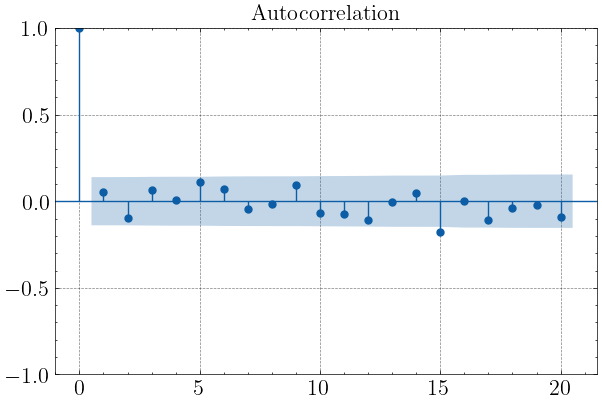

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot da autocorrelação da série de diferenças (o ; no final da linha impede que o gráfico seja plotado 2 vezes)
plot_acf(diff_series, lags=20);

### Previsão de um _random walk_

Dado que uma série temporal com as características exploradas até então é completamente aleatória, **não** é possível prever com precisão os seus valores futuros utilizando modelos estatísticos. No melhor dos casos, em que deseja-se prever a série com um horizonte de previsão **pequeno**, as ferramentas com melhor desempenho serão os modelos **ingênuos**. Em especial, um modelo _baseline_ que apresenta bom desempenho na previsão de _random walks_ é aquele que simplesmente diz que o **próximo valor da série será igual ao valor atual** (exatamente o naïve que utilizamos no projeto da IHM).